# 3DVSS 2025 - Digital Image Processing

In [2]:
# Install required packages
!pip install -q gdown


In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
# Download images
import gdown
gdown.download(f"https://drive.google.com/uc?id=1uVym6f1NPkMbveTvxQy_W5xokOgqUkUg", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1ilXDvfnY-plmEspwFLgkzkIGOYmBF68L", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1genj0r3i35NU4SG0qsl68wY5hj3iguqR", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1yr6DINaH5HeiDq7DL4nhtDNtAbLsl_Kz", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1qDc5MfqxB2xrgabFU6DnfYaTUYUTOOoB", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1cGb3FNBJIMCjWUlOh1Xh-6kGdoJoaJfn", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1VdNytl0z1E_mtsJqQAeBZaiNkmbQjdzX", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1HkSwSPqozB69lkNQnO8sHvisK5SJSgtG", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1ZGEE_AgYekq4YIHisjmNOd2I80baC8al", quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1uVym6f1NPkMbveTvxQy_W5xokOgqUkUg
To: /content/lotus.jpg
100%|██████████| 216k/216k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ilXDvfnY-plmEspwFLgkzkIGOYmBF68L
To: /content/lena.png
100%|██████████| 513k/513k [00:00<00:00, 76.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1genj0r3i35NU4SG0qsl68wY5hj3iguqR
To: /content/encrypted.png
100%|██████████| 1.29M/1.29M [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yr6DINaH5HeiDq7DL4nhtDNtAbLsl_Kz
To: /content/dog.jpg
100%|██████████| 40.5k/40.5k [00:00<00:00, 67.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qDc5MfqxB2xrgabFU6DnfYaTUYUTOOoB
To: /content/background.jpg
100%|██████████| 108k/108k [00:00<00:00, 63.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cGb3FNBJIMCjWUlOh1Xh-6kGdoJoaJfn
To: /content/fingerprint_noise.jpeg
100%|██████████| 34.3k/34.3k [00:00<00:00, 36.3MB/s]
Downloading...
Fr

'texture.png'

## Basic Image Processing

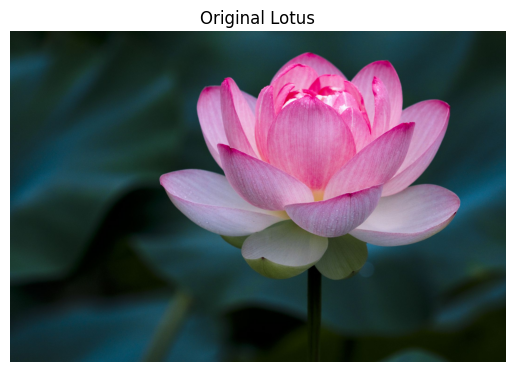

In [ ]:
# Helper function to display images
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image = cv2.imread('lotus.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image(image, "Original Lotus")


### Sobel Filter

Convert the image to gray scale. Apply Sobel filter to detect edges in the image.

#### Solution

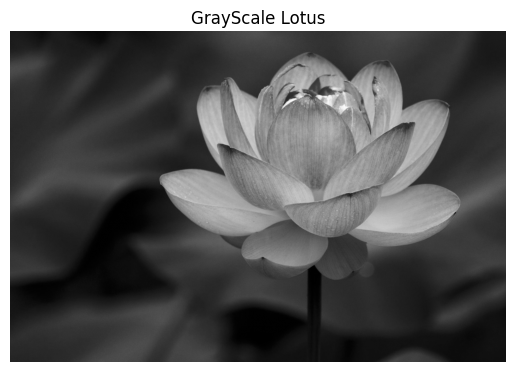

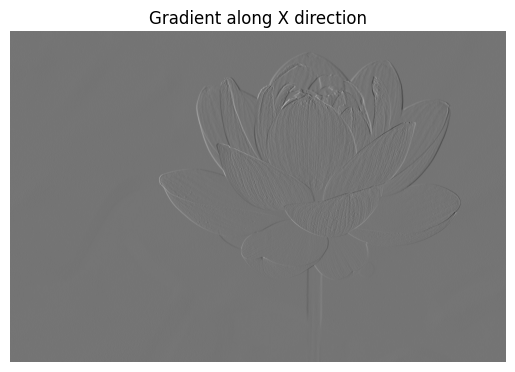

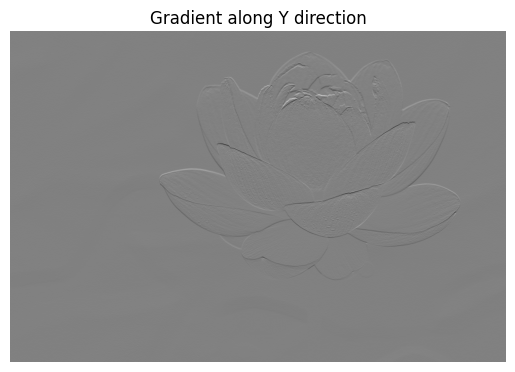

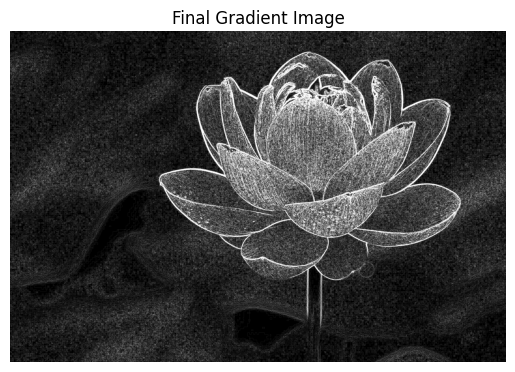

In [ ]:
lotus_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(lotus_gray, "GrayScale Lotus")

# Gradient along X direction
gradX = cv2.Sobel(lotus_gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
show_image(gradX, "Gradient along X direction")

# Gradient along Y direction
gradY = cv2.Sobel(lotus_gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
show_image(gradY, "Gradient along Y direction")

# Absolute gradient
gradient = np.sqrt((gradX * gradX) + (gradY * gradY))
gradient = cv2.convertScaleAbs(gradient)
show_image(gradient, "Final Gradient Image")

### Laplacian Filter

Find the edges, now using the laplacian filter.

#### Solution

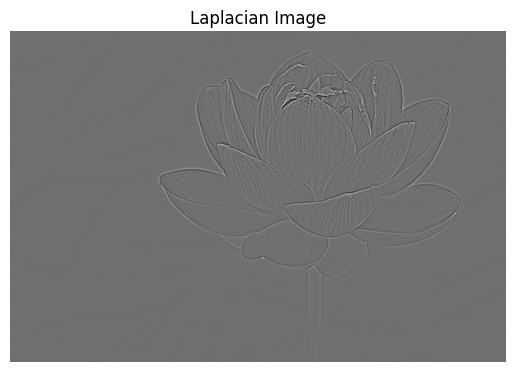

In [ ]:
# Laplacian

laplacian = cv2.Laplacian(lotus_gray, cv2.CV_64F, ksize=21)
show_image(laplacian, "Laplacian Image")


### Gaussian Blurring

Apply gaussian blurring to the image

#### Solution

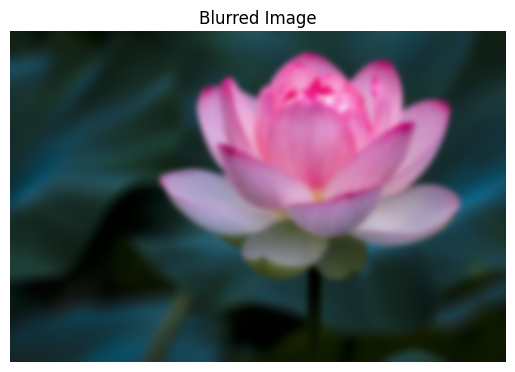

In [ ]:
# Applying Gaussian Blur
ksize = 75
lotus_blurred = cv2.GaussianBlur(image, (ksize, ksize), 0)
show_image(lotus_blurred, "Blurred Image")

### Gamma Correction

Apply gamma correction to the image

#### Solution

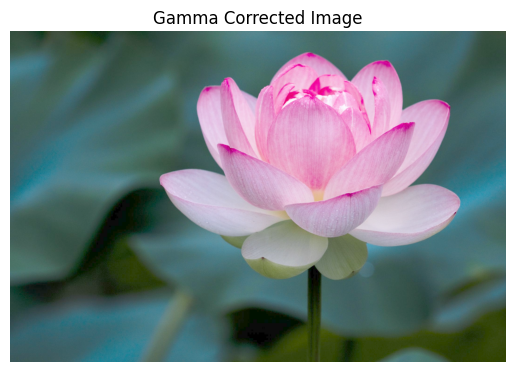

In [ ]:
# Gamma correction
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_corrected = gamma_correction(image, 1.8)
show_image(gamma_corrected, "Gamma Corrected Image")

### Contrast Streching

Try to increase or reduce the contrast of the image

#### Solution

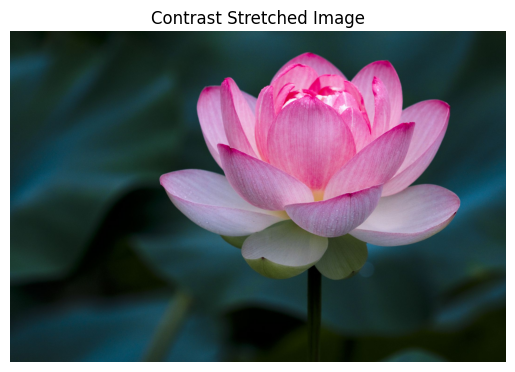

In [ ]:
# Contrast Stretching
min_val = np.min(image)
max_val = np.max(image)
contrast_stretched = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
show_image(contrast_stretched, "Contrast Stretched Image")


In [ ]:
print(f"Min: {min_val}, Max: {max_val}")

Min: 0, Max: 255


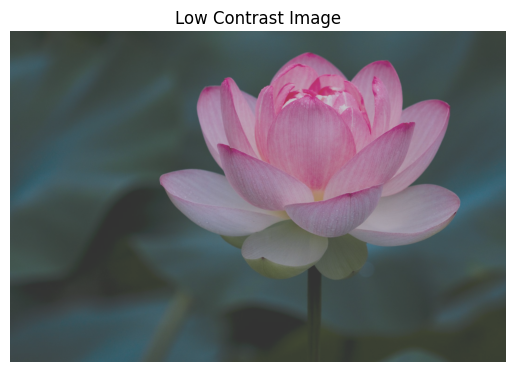

In [ ]:
# Reduce contrast by compressing intensity values to a narrower range
min_target, max_target = 50, 200

image_float = image.astype(np.float32)
image_norm = (image_float - image_float.min()) / (image_float.max() - image_float.min())
image_low_contrast = (image_norm * (max_target - min_target) + min_target).astype(np.uint8)

show_image(image_low_contrast, "Low Contrast Image")


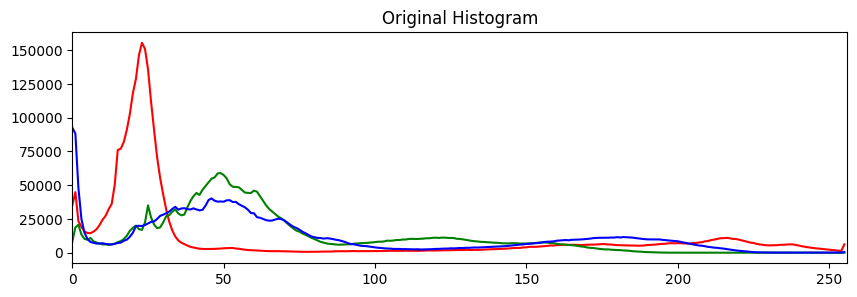

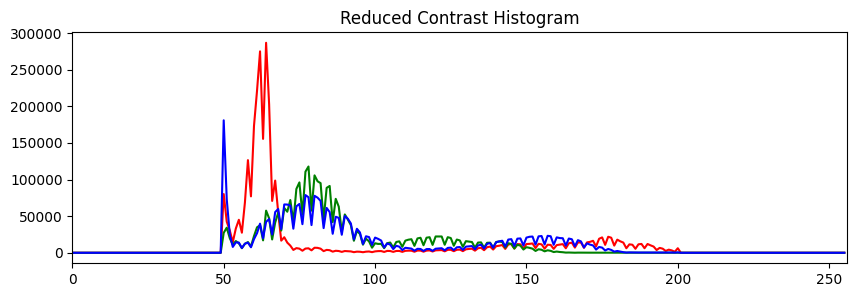

In [ ]:
def plot_histogram_rgb(img, title):
    plt.figure(figsize=(10, 3))
    for i, color in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title(title)
    plt.xlim([0, 256])
    plt.show()

plot_histogram_rgb(image, "Original Histogram")
plot_histogram_rgb(image_low_contrast, "Reduced Contrast Histogram")


### Histogram Equalization

Perform histogram equalization on the image by applying CLAHE to the L channel after converting the image to LAB color space

#### Solution

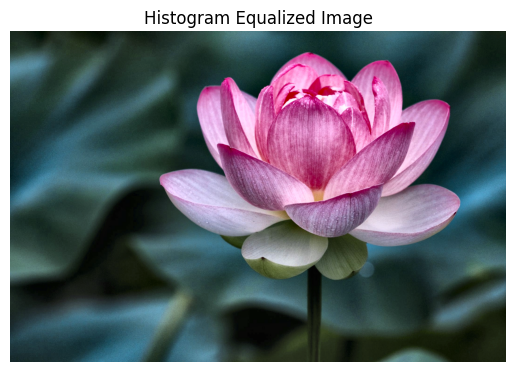

In [ ]:
# Histogram Equalisation
def adaptive_hist_equalization(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    l_clahe = clahe.apply(l)

    # Merge channels and convert back to BGR
    lab_clahe = cv2.merge((l_clahe, a, b))
    result = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
    return result

hist_eq_lotus = adaptive_hist_equalization(image)
show_image(hist_eq_lotus, "Histogram Equalized Image")


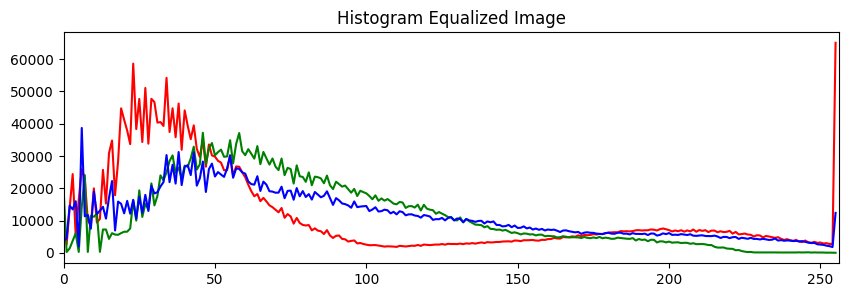

In [ ]:
plot_histogram_rgb(hist_eq_lotus, "Histogram Equalized Image")

## Chroma Keying

Size of Foreground Image: (768, 1024, 3)


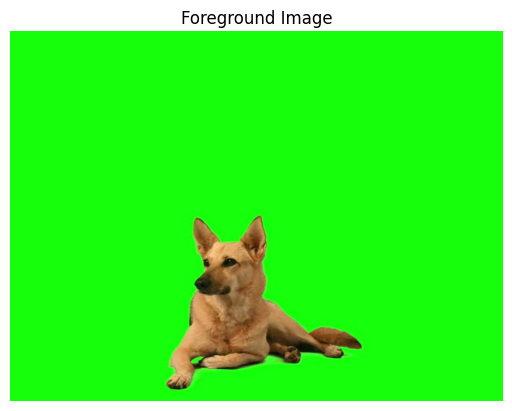

Size of Background Image: (768, 1024, 3)


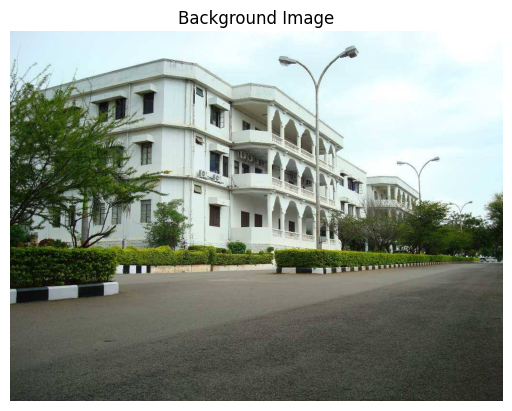

In [ ]:
# Reading and Displaying the foreground and the background image
fg_img = cv2.imread('dog.jpg')
fg_img = cv2.cvtColor(fg_img, cv2.COLOR_BGR2RGB)

bg_img = cv2.imread('background.jpg')
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)

print(f"Size of Foreground Image: {fg_img.shape}")
plt.imshow(fg_img)
plt.title(f"Foreground Image")
plt.axis("off")
plt.show()

print(f"Size of Background Image: {bg_img.shape}")
plt.imshow(bg_img)
plt.title(f"Background Image")
plt.axis("off")
plt.show()


Try to add the dog to the background image given by replacing the green pixels

#### Solution

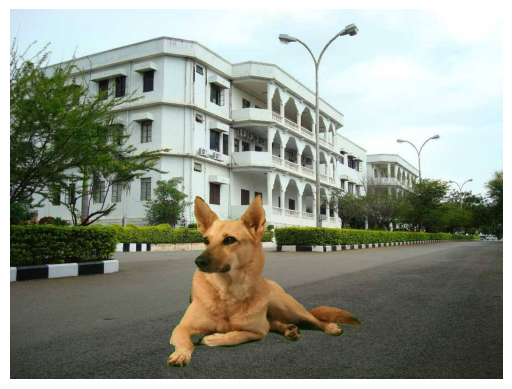

In [ ]:
# Chroma Keying using cv2.inRange

# Range of pixel values which will be considered as a green pixel
lower_green = np.array([0, 125, 0])
upper_green = np.array([150, 256, 150])

# This returns an array containing 255 where the condition is satisfied and 0 otherwise
green_pixel_mask = cv2.inRange(fg_img, lower_green, upper_green)
final_img_cv2 = copy.deepcopy(fg_img)
final_img_cv2[green_pixel_mask == 255] = bg_img[green_pixel_mask == 255]

plt.imshow(final_img_cv2)
plt.axis("off")
plt.show()

## Morphological Operations

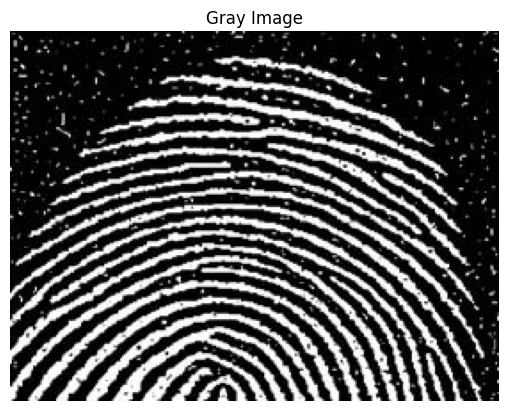

In [ ]:
image = cv2.imread("fingerprint_noise.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")


Clean the fingerprint image to remove the noise. Try to use morphological operations

#### Solution

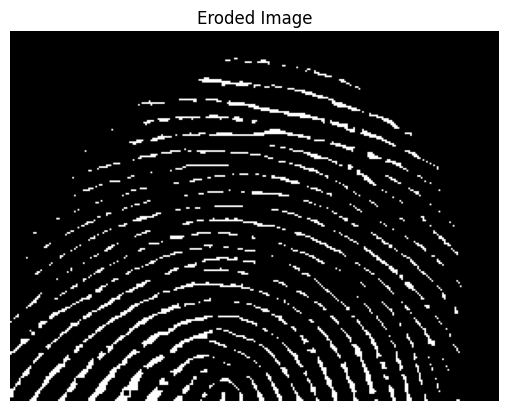

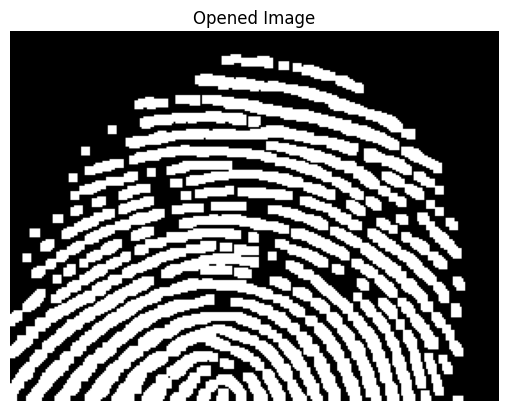

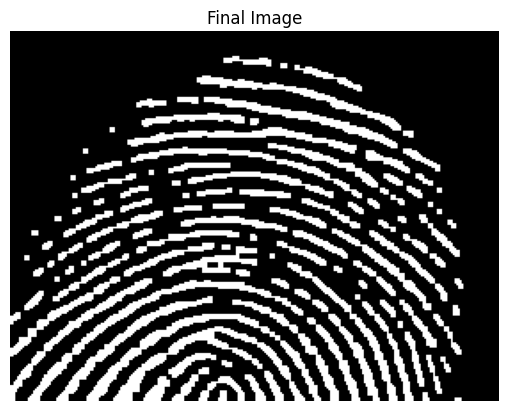

In [ ]:

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))  # k x k rectangle structuring element

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
show_image(eroded_image, "Eroded Image")

# Apply dilation
opened_image = cv2.dilate(eroded_image, kernel, iterations=2)
show_image(opened_image, "Opened Image")

# Apply erosion
final_image = cv2.erode(opened_image, kernel, iterations=1)
show_image(final_image, "Final Image")

## Bit Quantization

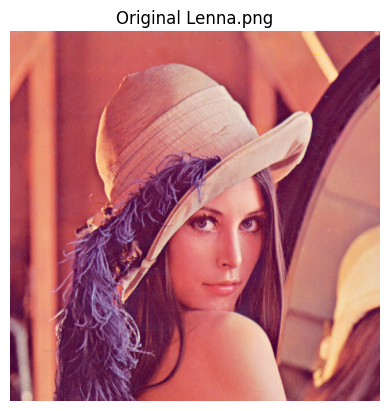

In [ ]:
lenna = cv2.imread("lena.png")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

plt.imshow(lenna)
plt.axis("off")
plt.title("Original Lenna.png")
plt.show()

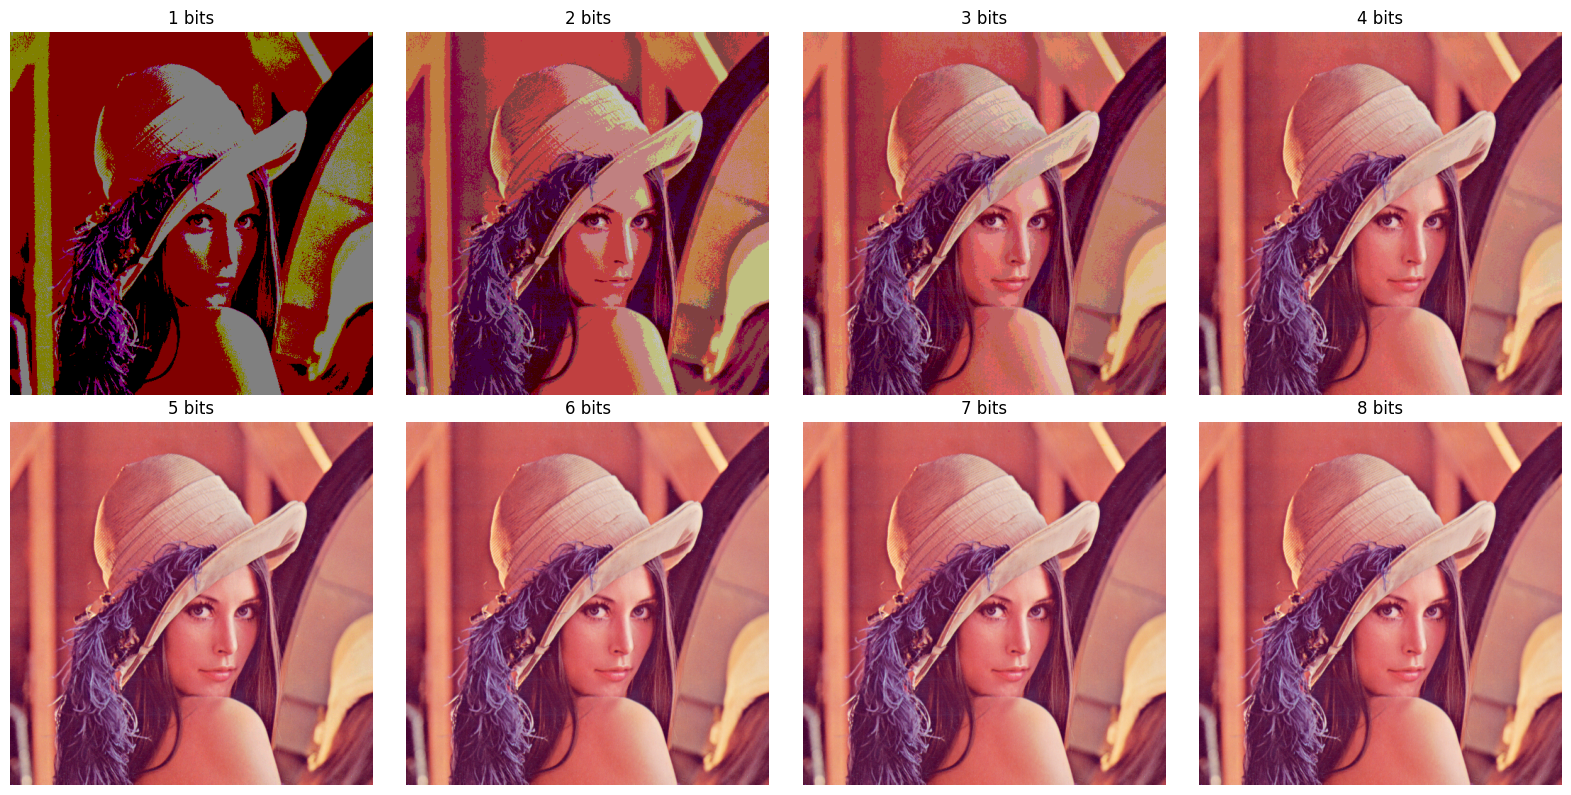

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

def quantize(image, num_of_bits):
    quantized_image = image >> (8-num_of_bits)
    quantized_image = quantized_image << (8-num_of_bits)
    return quantized_image.astype(np.uint8)


for i in range(8):
    num_of_bits = i + 1
    quantized_image = quantize(lenna, num_of_bits)
    cv2.imwrite(f"out_img/Question1/Lenna_{num_of_bits}_bits.png", cv2.cvtColor(quantized_image, cv2.COLOR_RGB2BGR))
    axes[i].imshow(quantized_image)
    axes[i].set_title(f"{num_of_bits} bits")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Can you see that the image is not much changed even when represented with lesser number of bits? Can we use this to embed an image into another?

The encrypted.png image of Taj Mahal contains one more wonder of the world. Can you find it? The image is encrypted using a simple bit quantization technique. Try to decrypt it and find the hidden image.

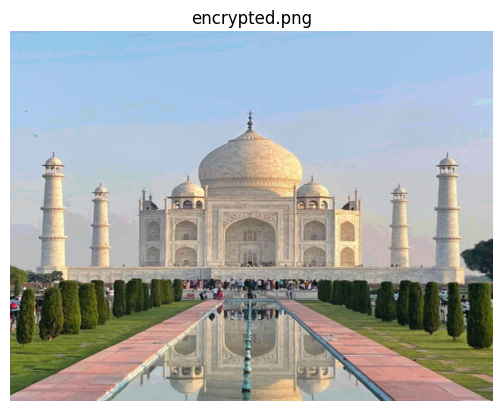

In [ ]:
img = cv2.imread("encrypted.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.title("encrypted.png")
plt.show()

### Solution

In [ ]:
def decrypt(encrypted):
    decrypted = (encrypted << 4)
    return decrypted

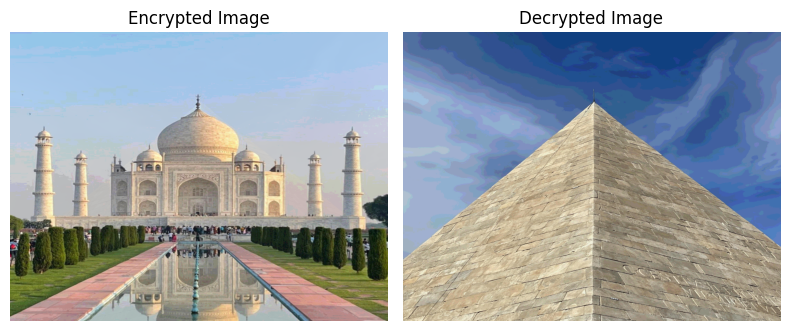

In [ ]:
taj = cv2.imread("encrypted.png")
taj = cv2.cvtColor(taj, cv2.COLOR_BGR2RGB)
decrypted = decrypt(taj)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

axes[0].imshow(taj)
axes[0].set_title("Encrypted Image")
axes[0].axis('off')

axes[1].imshow(decrypted)
axes[1].set_title("Decrypted Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()


Take any 2 images and encrypt one into another using the same technique. Display the encrypted image and the decrypted image.

## Retro Effect

Add retro effect to cycle.png using the texture mask.

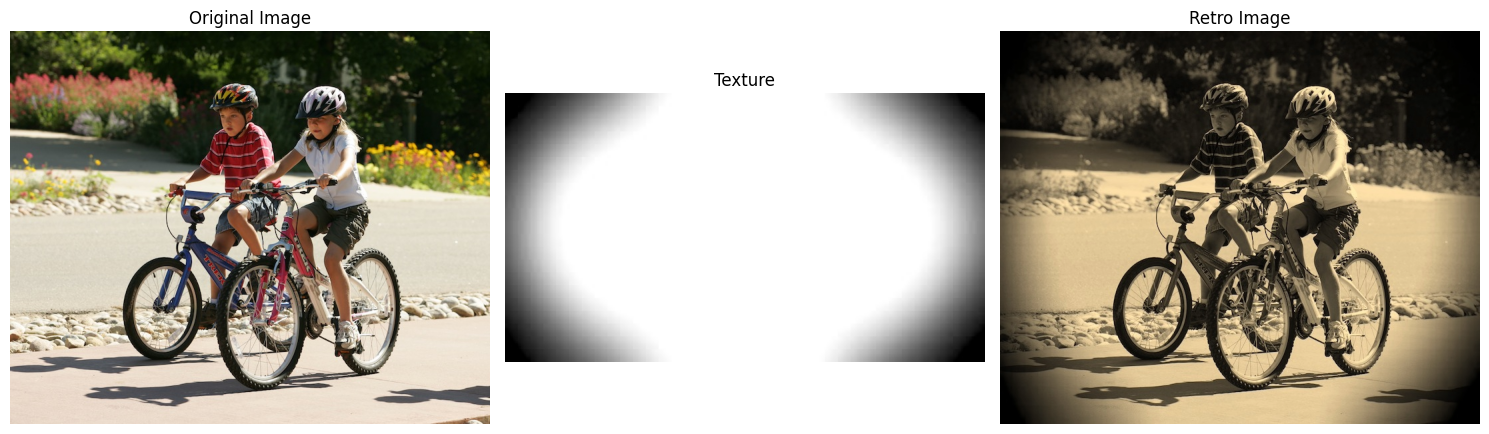

In [ ]:
image_path = "cycle.png"
texture_path = "texture.png"
retro_image = "cycle_retro.png"

# Load images (BGR to RGB for matplotlib)
img1 = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(texture_path), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread(retro_image), cv2.COLOR_BGR2RGB)

# Display using subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img1)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(img2)
ax[1].set_title("Texture")
ax[1].axis("off")

ax[2].imshow(img3)
ax[2].set_title("Retro Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()

#### Solution

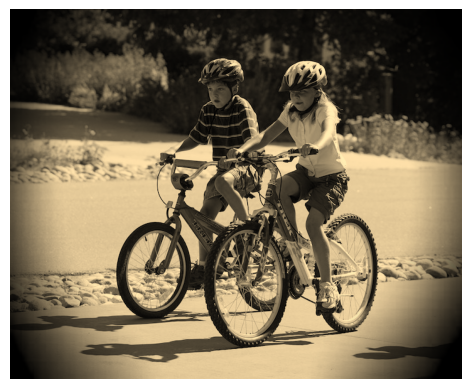

In [ ]:
def apply_retro_effect(image_path, texture_path):

    # Load the image and texture
    image = cv2.imread(image_path)
    texture = cv2.imread(texture_path)

    # Create empty arrays to hold the transformed channels with the same data type and size as the original image
    outB = image[:, :, 0].copy().astype(float)  # Convert to float for calculations
    outG = image[:, :, 1].copy().astype(float)
    outR = image[:, :, 2].copy().astype(float)

    # Apply the color transformation using addWeighted
    outB = cv2.addWeighted(image[:, :, 0], 0.172, image[:, :, 1], 0.534, 0, outB)
    outG = cv2.addWeighted(image[:, :, 0], 0.249, image[:, :, 1], 0.686, 0, outG)
    outR = cv2.addWeighted(image[:, :, 0], 0.293, image[:, :, 1], 0.769, 0, outR)

    # Stack the channels to form the transformed image
    # You can also use np.stack for the same purpose
    image = cv2.merge([outB, outG, outR])

    # Resize the texture image to match the image size (optional)
    texture = cv2.resize(texture, (image.shape[1], image.shape[0]))

    # Apply the texture with a multiply blend mode for a subtle effect
    image = cv2.multiply(image, texture, scale=1 / 255)

    return image

# Apply the retro effect and display the resulting image
edited_image = apply_retro_effect(image_path, texture_path)
edited_image = cv2.cvtColor(edited_image, cv2.COLOR_BGR2RGB)

plt.imshow(edited_image)
plt.axis("off")
plt.show()

### Made by
[Gaurav](https://www.linkedin.com/in/gauravbehera) and [Abhinav](https://www.linkedin.com/in/abhinav-raundhal-2355192a8)